<a href="https://colab.research.google.com/github/gaiobr/aprendizado-de-maquina-edge-ufal/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados de Qualidade de Vinho Tinto**

Dataset com dados fisíco-químicos e sensorial sobre vinhos tintos da denominação de origem controlada "Vinho Verde".

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009



In [152]:
  from google.colab import drive
  drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **1. Importar bibliotecas**

In [153]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# **2. Carregar conjunto de dados**

In [154]:
# Carregar dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/winequality-red.csv')

In [155]:
# Verificar dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## **3. Limpar e organizar os dados**

In [156]:
# Verificar e excluir valores NaN, ? ou dados faltantes
df = df.dropna()

## **4. Re-escalar os dados**

### **Re-escalar usando máximo e mínimo**

In [157]:
df.iloc[:,:-1] = (df.iloc[:,:-1] - df.iloc[:,:-1].min())/(df.iloc[:,:-1].max()-df.iloc[:,:-1].min())

In [158]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5


In [159]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,5.636023
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.807569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,5.000000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,6.000000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


## **5. Organizar os dados para modelagem**

### **Dividir os dados entre atributos descritores e atributos de classe (target)**

In [160]:
# Dividir dados em atributos descritores e atributo de classe
df_x = df.iloc[:,:-1]
df_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [161]:
df_y = df.quality
df_y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

### **Dividir os dados entre treino e teste**

In [162]:
# Carregar biblioteca necessária
from sklearn.model_selection import train_test_split

In [163]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2)

In [164]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1269,0.079646,0.253425,0.03,0.061644,0.053422,0.380282,0.286219,0.053598,0.598425,0.293413,0.861538
1156,0.345133,0.041096,0.51,0.058219,0.098497,0.619718,0.289753,0.379589,0.464567,0.257485,0.523077
1496,0.274336,0.287671,0.26,0.068493,0.128548,0.309859,0.498233,0.461821,0.409449,0.155689,0.200000
178,0.212389,0.469178,0.00,0.109589,0.093489,0.084507,0.049470,0.501468,0.582677,0.137725,0.184615
806,0.336283,0.089041,0.39,0.075342,0.048414,0.042254,0.014134,0.278267,0.417323,0.227545,0.630769


In [165]:
y_train.head()

1269    8
1156    7
1496    5
178     5
806     7
Name: quality, dtype: int64

## **6. Definir algoritmo de aprendizado**

In [166]:
# Carregar biblioteca necessária
from sklearn.tree import DecisionTreeClassifier

In [167]:
# Definir modelo
classificador = DecisionTreeClassifier()

In [168]:
# Treinar modelo
classificador.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [169]:
# Carregar biblioteca necessária
from sklearn.tree import plot_tree

In [170]:
# Alterar tamanho da figura
plt.rcParams['figure.figsize'] = (30,20)

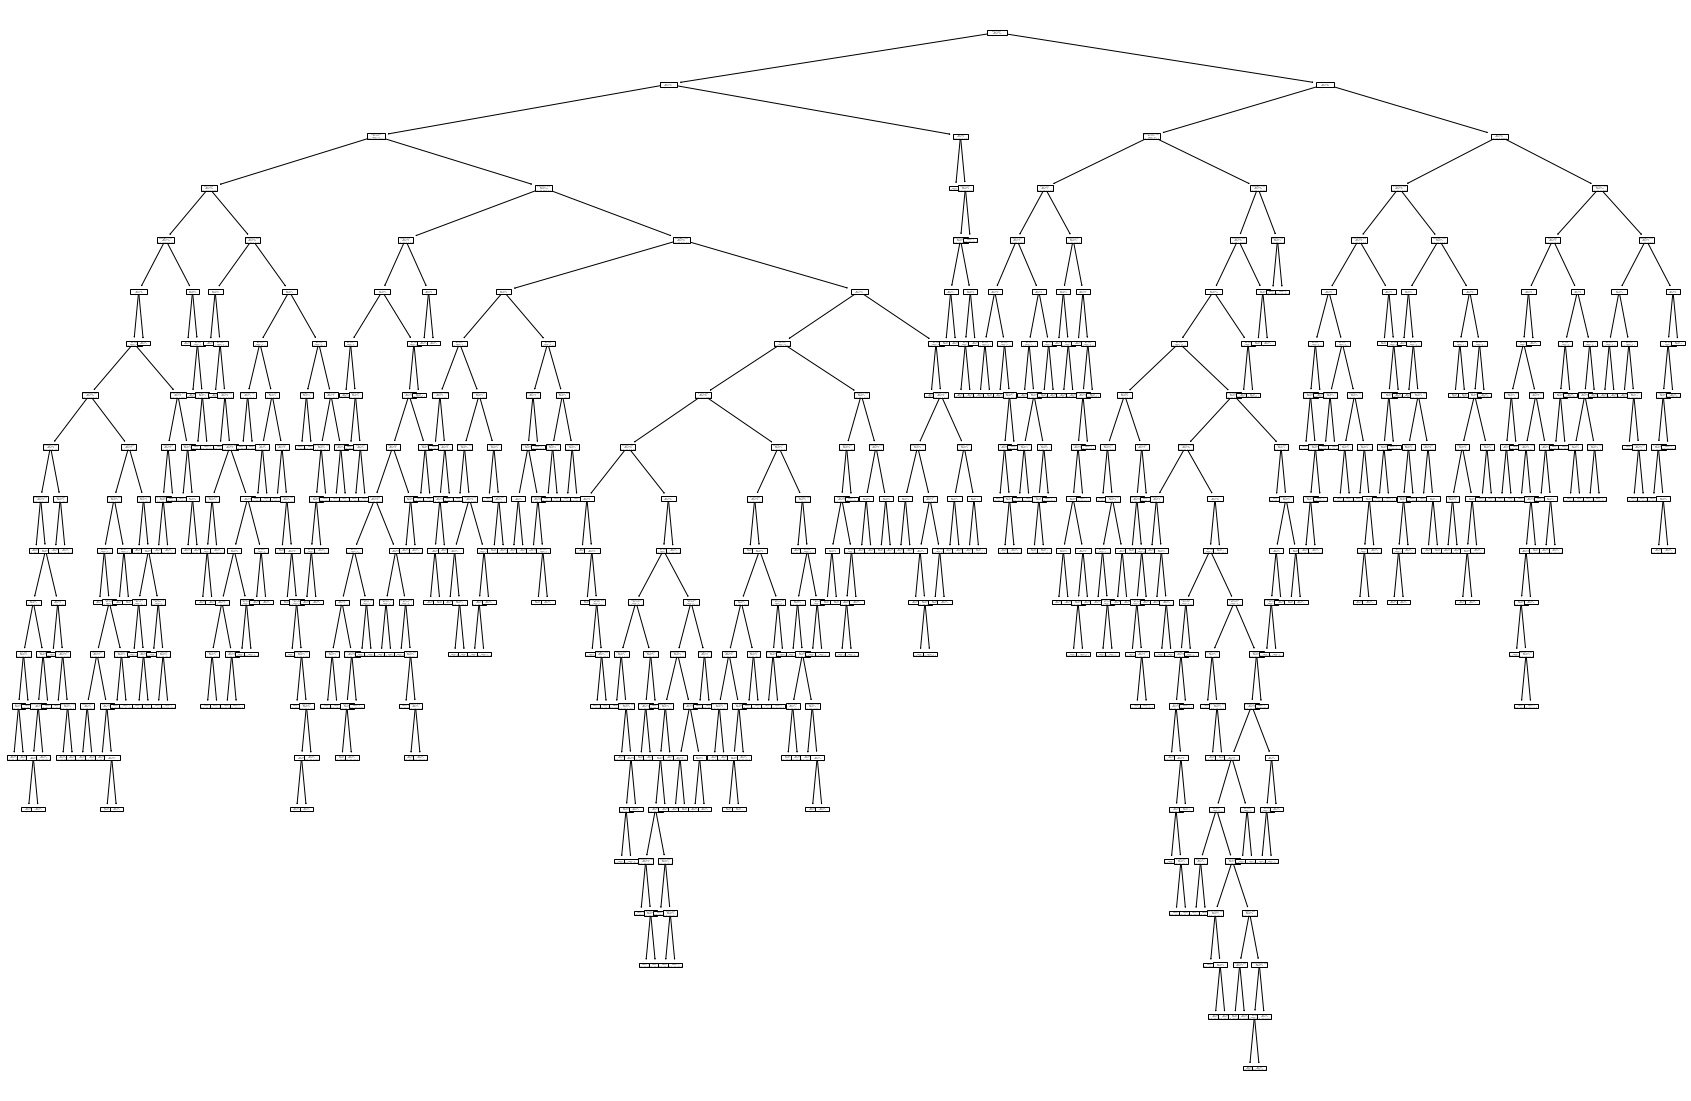

In [171]:
plot_tree(classificador, feature_names=df.columns[:-1])
plt.show()

In [172]:
# Realizar classificação
classificacao = classificador.predict(x_test)
classificacao

array([6, 5, 6, 5, 8, 6, 5, 5, 7, 5, 7, 5, 6, 6, 5, 5, 6, 6, 5, 6, 7, 6,
       5, 5, 5, 5, 6, 5, 5, 7, 6, 5, 6, 5, 6, 7, 5, 7, 6, 5, 6, 5, 5, 6,
       5, 5, 6, 5, 7, 6, 6, 4, 5, 5, 5, 6, 5, 5, 7, 5, 5, 5, 5, 6, 5, 5,
       5, 6, 5, 5, 6, 5, 6, 7, 7, 5, 7, 6, 5, 5, 7, 5, 6, 5, 5, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 6, 7, 7, 5, 5, 7, 5, 6, 5, 6, 6, 5, 5, 6, 5, 7,
       5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6,
       5, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 6, 7, 5, 5, 6, 3, 7,
       6, 6, 6, 7, 5, 6, 5, 5, 7, 5, 6, 6, 7, 7, 4, 5, 6, 6, 5, 6, 6, 6,
       6, 5, 7, 7, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 4, 5, 7, 7, 6, 5, 4, 7,
       5, 6, 6, 5, 5, 7, 6, 6, 5, 6, 6, 6, 6, 6, 5, 7, 6, 7, 6, 6, 5, 7,
       6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 4, 5, 5, 6, 6, 6, 5, 5,
       7, 6, 4, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 7, 6, 6, 5, 6, 7,
       5, 6, 6, 6, 6, 7, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 7, 7,
       5, 7, 6, 5, 6, 6, 5, 5, 6, 7, 7, 5, 6, 5, 5,

In [173]:
# Mudar o tamanho da figura
plt.rcParams["figure.figsize"] = (8,6)

## **7. Avaliar o classificador**

In [174]:
# Calcular acurácia
from sklearn.metrics import accuracy_score

In [175]:
acuracia = accuracy_score(y_test, classificacao)
acuracia

0.64375

In [176]:
# Calcular precisão
from sklearn.metrics import precision_score

In [177]:
precisao = precision_score(y_test,classificacao, average='micro')
precisao

0.64375

In [178]:
# Calcular recall
from sklearn.metrics import recall_score

In [179]:
recall = recall_score(y_test, classificacao, average='micro')
recall

0.64375

In [180]:
# Calcular f1-score
from sklearn.metrics import f1_score

In [181]:
f1 = f1_score(y_test, classificacao, average='micro')
f1

0.64375

### **Curva ROC**

In [182]:
# Plotar curva ROC
from sklearn.metrics import roc_curve

In [183]:
fpr, tpr, _ = roc_curve(y_test, classificacao, pos_label=8)

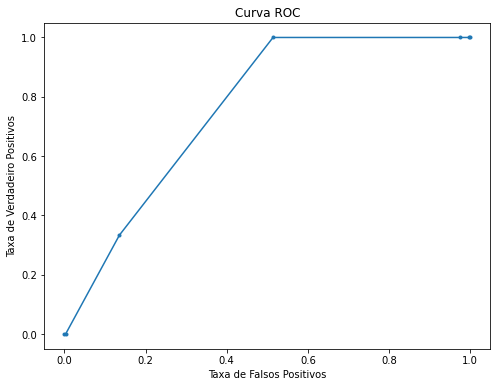

In [184]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

### **Validação cruzada**

In [185]:
# Avaliar modelos com cross validation
from sklearn.model_selection import cross_val_score

In [186]:
# Definir modelo
classificador = DecisionTreeClassifier()

In [187]:
# Calcular scores
scores = cross_val_score(classificador, df_x, df_y, cv = 10)
scores

array([0.45      , 0.51875   , 0.40625   , 0.5       , 0.4625    ,
       0.525     , 0.41875   , 0.49375   , 0.43125   , 0.49685535])

In [188]:
scores.mean(), scores.std()

(0.47031053459119504, 0.04029182024521502)

## **8. Comparar Árvore de Decisão com Random Forest**

### **Método Holdout**

In [189]:
# Definir árvore de decisão
arvore = DecisionTreeClassifier()
arvore.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [190]:
# Definir random forest
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [191]:
# Calcular acurácia da árvore de decisão
arvore.score(x_test, y_test)

0.64375

In [192]:
# Calcular acurácia da random forest
floresta.score(x_test, y_test)

0.70625

In [193]:
# Realizar previsão com árvore de decisão
clf_arvore = arvore.predict(x_test)

In [194]:
# Realizar previsão com random forest
clf_floresta = floresta.predict(x_test)

In [195]:
# Calcular curva ROC da árvore de decisão
fpr_ar, tpr_ar, _ = roc_curve(y_test,clf_arvore, pos_label=8)

In [196]:
# Calcular curva roc da random forest
fpr_fl, tpr_fl, _ = roc_curve(y_test,clf_floresta, pos_label = 8)

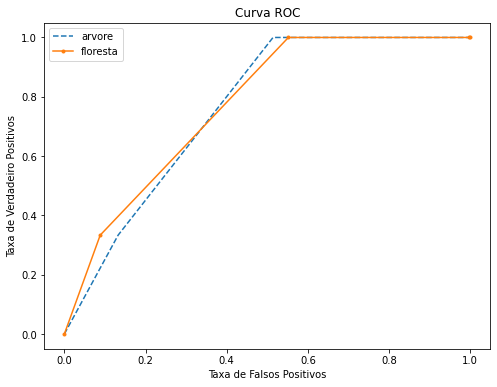

In [197]:
# Plotar curvas
plt.plot(fpr_ar,tpr_ar,linestyle='--',label='arvore')
plt.plot(fpr_fl,tpr_fl,marker='.',label='floresta')
plt.title('Curva ROC')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

### **Validação cruzada**

In [198]:
# Criar árvore
arvore = DecisionTreeClassifier()

# Calcular os scores
scores = cross_val_score(arvore,df_x,df_y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.475, 0.031)

In [199]:
# Criar floresta
floresta = RandomForestClassifier()

# Calcular os scores
scores = cross_val_score(floresta,df_x,df_y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.568, 0.029)

## **9. Análise dos Resultados**

As categorias de qualidade variam entre a faixa de 3 a 8. Sendo que as categorias 5 e 6 concentram a maior parte das observações.
É provável que essa distribuição influencie nos resultados de aprendizado do modelo.

A curva ROC demonstra valores bem semelhantes para árvore e floresta. As linhas se afastam do topo e da esquerda do gráfico, indicando um alto número de falsos positivos. 

A capacidade de predição dos modelos, tanto analisando as saídas da árvore de decisão, quanto da floresta, é relativamente baixa, considerando que variou entre 56,8% (floresta) e 47,5% (árvore).



